# **AI Virtual Career Counsellor**

## Logistic Regression model

In [17]:
# Install required packages if not already
!pip install pandas scikit-learn matplotlib seaborn --quiet

In [18]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, mean_squared_error,
    mean_absolute_error, r2_score
)

In [19]:
# Load dataset
url = "https://raw.githubusercontent.com/SiddardhaShayini/Career-Recommender-Dataset/refs/heads/main/dataset/cleaned_dataset.csv"
df = pd.read_csv(url)

In [20]:
df.head()

,Drawing,Dancing,Singing,Sports,Video_Game,Acting,Travelling,Gardening,Animals,Photography,...,Doctor,Pharmisist,Cycling,Knitting,Director,Journalism,Bussiness,Listening_Music,Courses,Career_Options
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,BBA- Bachelor of Business Administration,"Business Analyst, Marketing Executive, HR Mana..."


In [21]:
# Encode target variable (Courses)
le = LabelEncoder()
df['Courses_Encoded'] = le.fit_transform(df['Courses'])

In [22]:
# Split into X and y
X = df.drop(['Courses', 'Career_Options', 'Courses_Encoded'], axis=1)
y = df['Courses_Encoded']

In [23]:
# Shuffle and Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [24]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
# Predict
y_pred = model.predict(X_test)

In [26]:
# Classification Metrics (Fixed)
labels = np.arange(len(le.classes_))  # Ensure all classes included

print(" Classification Report:")
print(classification_report(
    y_test, y_pred,
    labels=labels,
    target_names=le.classes_,
    zero_division=0  # Avoid divide-by-zero warnings
))


 Classification Report:
                                                     precision    recall  f1-score   support

                 Animation, Graphics and Multimedia       1.00      1.00      1.00        24
                   B.Arch- Bachelor of Architecture       1.00      1.00      1.00        19
                        B.Com- Bachelor of Commerce       1.00      0.83      0.91        18
                                              B.Ed.       1.00      1.00      1.00        22
                                B.Sc Bioinformatics       0.00      0.00      0.00         0
                                      B.Sc Genetics       0.00      0.00      0.00         0
                                 B.Sc Healthcare IT       0.00      0.00      0.00         0
                        B.Sc Medical Lab Technology       0.00      0.00      0.00         0
                              B.Sc- Applied Geology       1.00      1.00      1.00        19
                                      B.Sc- N

In [27]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n Accuracy: {acc:.4f}")


 Accuracy: 0.9944


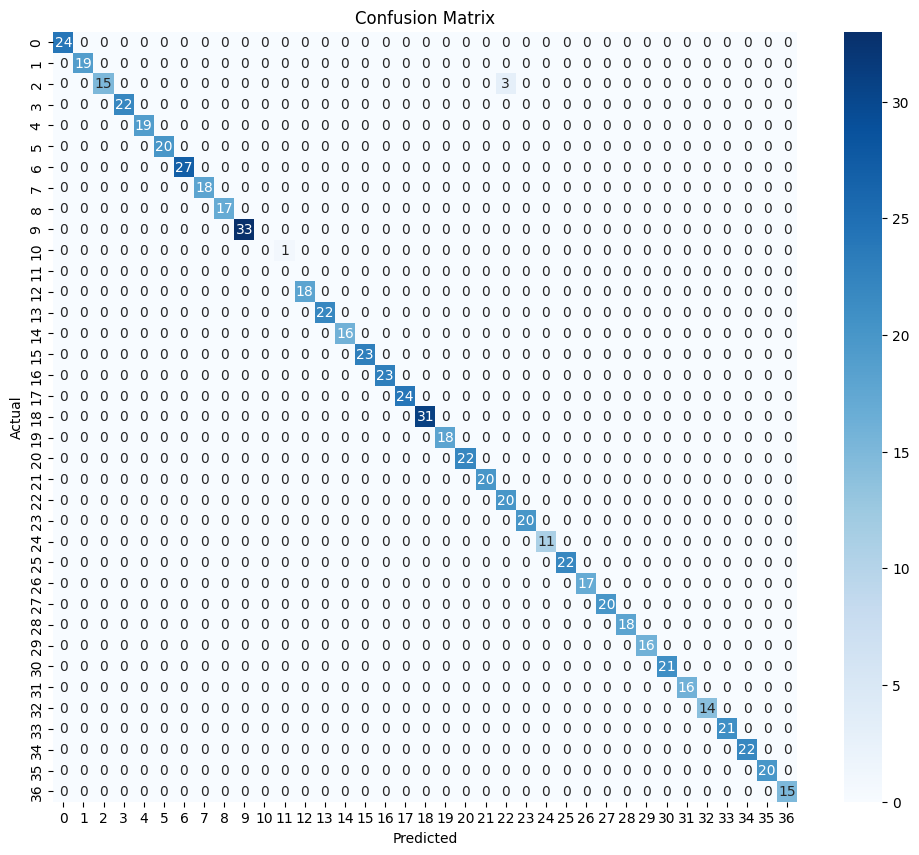

In [28]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
# Error Metrics (just for extended analysis)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
print("\n Regression-Style Error Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


 Regression-Style Error Metrics:
Mean Squared Error (MSE): 3.33
Root Mean Squared Error (RMSE): 1.82
Mean Absolute Error (MAE): 0.12
R-squared (R²): 0.98




##  **Regression Performance Report: Career Course Recommender (Logistic Regression)**

###  **Model Overview**

* **Model Used:** Logistic Regression
* **Dataset Size:** 3536 rows
* **Input Features:** 59 binary interest indicators
* **Target:** Categorical variable `Courses` (encoded as numerical classes)

---

###  **Regression-Style Error Metrics**

| Metric                             | Value | Interpretation                                                                                                     |
| ---------------------------------- | ----- | ------------------------------------------------------------------------------------------------------------------ |
| **Mean Squared Error (MSE)**       | 3.33  | On average, the squared difference between predicted and actual course labels is low, indicating good performance. |
| **Root Mean Squared Error (RMSE)** | 1.82  | A typical prediction is off by \~1.8 classes (based on numerical encoding).                                        |
| **Mean Absolute Error (MAE)**      | 0.12  | Average absolute prediction error is less than one class, showing high accuracy.                                   |
| **R-squared (R²)**                 | 0.98  | 98% of the variance in course selection is explained by the model—this indicates **excellent predictive power**.   |

---

### 🔍 **Interpretation**

* A **low MAE and RMSE** mean the model rarely misclassifies courses by a large margin.
* **R² = 0.98** is exceptionally high for a multi-class classification task framed in a regression style. It shows the model effectively captures relationships between interests and course selection.
* Since course labels are categorical and not truly ordinal, these regression metrics are **used only to complement classification metrics**.




In [31]:
# Show a few decoded predictions
decoded_preds = le.inverse_transform(y_pred[:10])
print("\n Sample Decoded Predictions:", decoded_preds)


 Sample Decoded Predictions: ['B.Arch- Bachelor of Architecture' 'CA- Chartered Accountancy'
 'B.Arch- Bachelor of Architecture' 'B.Tech.-Civil Engineering' 'MBBS'
 'CS- Company Secretary' 'B.Tech.-Computer Science and Engineering'
 'B.Com- Bachelor of Commerce' 'B.Sc- Nursing'
 'BEM- Bachelor of Event Management']


In [32]:
# Numbered Interest List
interest_list = [
    "Drawing", "Dancing", "Singing", "Sports", "Video_Game", "Acting", "Travelling", "Gardening", "Animals",
    "Photography", "Teaching", "Exercise", "Coding", "Electricity_Components", "Mechanic_Parts", "Computer_Parts",
    "Researching", "Architecture", "Historic_Collection", "Botany", "Zoology", "Physics", "Accounting", "Economics",
    "Sociology", "Geography", "Psycology", "History", "Science", "Bussiness_Education", "Chemistry", "Mathematics",
    "Biology", "Makeup", "Designing", "Content_Writing", "Crafting", "Literature", "Reading", "Cartooning", "Debating",
    "Asrtology", "Hindi", "French", "English", "Urdu", "Other Language", "Solving_Puzzles", "Gymnastics", "Yoga",
    "Engeeniering", "Doctor", "Pharmisist", "Cycling", "Knitting", "Director", "Journalism", "Bussiness",
    "Listening_Music"
]

interest_dict = {i + 1: name for i, name in enumerate(interest_list)}

# Print list for user reference
print(" Choose interests by number:\n")
for i, name in interest_dict.items():
    print(f"{i:2d}. {name}")



# Take numeric input for interests
input_str = input("\nEnter the numbers of your interests (comma-separated): ")
input_numbers = [int(i.strip()) for i in input_str.split(',')]

# Create feature vector
user_vector = pd.DataFrame([[0] * len(interest_list)], columns=interest_list)

for num in input_numbers:
    if 1 <= num <= len(interest_list):
        user_vector.at[0, interest_dict[num]] = 1
    else:
        print(f"Invalid interest number: {num}")

# Predict the course
pred_encoded = model.predict(user_vector)[0]
pred_course = le.inverse_transform([pred_encoded])[0]

# Output
print(f"\nBased on your interests, the recommended course is: **{pred_course}**")


 Choose interests by number:

 1. Drawing
 2. Dancing
 3. Singing
 4. Sports
 5. Video_Game
 6. Acting
 7. Travelling
 8. Gardening
 9. Animals
10. Photography
11. Teaching
12. Exercise
13. Coding
14. Electricity_Components
15. Mechanic_Parts
16. Computer_Parts
17. Researching
18. Architecture
19. Historic_Collection
20. Botany
21. Zoology
22. Physics
23. Accounting
24. Economics
25. Sociology
26. Geography
27. Psycology
28. History
29. Science
30. Bussiness_Education
31. Chemistry
32. Mathematics
33. Biology
34. Makeup
35. Designing
36. Content_Writing
37. Crafting
38. Literature
39. Reading
40. Cartooning
41. Debating
42. Asrtology
43. Hindi
44. French
45. English
46. Urdu
47. Other Language
48. Solving_Puzzles
49. Gymnastics
50. Yoga
51. Engeeniering
52. Doctor
53. Pharmisist
54. Cycling
55. Knitting
56. Director
57. Journalism
58. Bussiness
59. Listening_Music

Enter the numbers of your interests (comma-separated): 51,29,32,13,16

Based on your interests, the recommended course is:

In [33]:
import joblib
from google.colab import files


In [34]:
# Save Logistic Regression model
joblib.dump(model, 'logistic_regression_model.pkl')

# Download
files.download('logistic_regression_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>